In [1]:
from GG_mthesis import *
import metpy
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\gian_\\repos\\mthesis_gianlucca'

## SOCAT

In [4]:
# df = pd.read_csv('data/01_raw/SOCATv2021_SouthernOceans.tsv', sep='\t', header=1232)

In [5]:
# df.to_csv('data/01_raw/dataset.csv')

In [16]:
df = pd.read_csv('data/01_raw/dataset.csv')

df = df.drop(['Unnamed: 0', 'version', 'GVCO2 [umol/mol]', 'xCO2water_equ_dry [umol/mol]', 'xCO2water_SST_dry [umol/mol]',
         'pCO2water_equ_wet [uatm]', 'pCO2water_SST_wet [uatm]', 'fCO2water_equ_wet [uatm]', 'fCO2water_SST_wet [uatm]', 'fCO2rec [uatm]',
         'fCO2rec_src', 'fCO2rec_flag', 'NCEP_SLP [hPa]', 'Pequ [hPa]', 'PPPP [hPa]', 'Source_DOI'
         ], axis=1)

df['longitude'] = df['longitude [dec.deg.E]']
df['latitude'] = df['latitude [dec.deg.N]']
df = df.drop(['longitude [dec.deg.E]', 'latitude [dec.deg.N]'], axis=1)
df['longitude'] = utils.utils.convert_lon_center(df['longitude'], center='Atlantic')

C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d01_data\processing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_front_sel = df_fronts_sel.set_index(['front',df_fronts_sel.index]).drop('index',1)


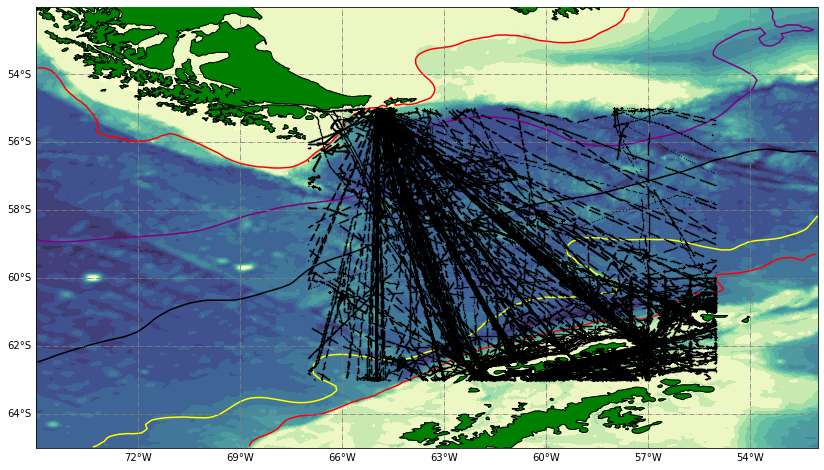

In [17]:
from GG_mthesis.d01_data.processing import rmap 
ax = rmap.plot_region()
ax.scatter(df['longitude'], df['latitude'], c='black', s=0.1,transform=ccrs.PlateCarree(), zorder=500)

In [21]:
df_sel = df.where(
    (df['longitude'] > -67) & 
    (df['longitude'] < -55) & 
    (df['latitude'] > -63) & 
    (df['latitude'] < -55)
    )
df_sel = df_sel.where(df_sel['ETOPO2_depth [m]'] >= 2500).dropna(how='all')

df_sel = df_sel.dropna(how='all')

df_sel = df_sel.reset_index().drop('index', axis=1)
df_sel = df_sel.where(df_sel['yr'] != 1984.).dropna(how='all')

df_sel['mm'][df_sel['ss'] >= 60] = df_sel['mm'][df_sel['ss'] >= 60] + df_sel['ss'][df_sel['ss'] >= 60]/60
df_sel['ss'][df_sel['ss'] >= 60] = df_sel['ss'][df_sel['ss'] >= 60] - 60
df_sel['hh'][df_sel['mm'] >= 60] = df_sel['hh'][df_sel['mm'] >= 60] + df_sel['mm'][df_sel['mm'] >= 60]/60
df_sel['mm'][df_sel['mm'] >= 60] = df_sel['mm'][df_sel['mm'] >= 60] - 60
df_sel['day'][df_sel['hh'] >= 24] = df_sel['day'][df_sel['hh'] >= 24] + df_sel['hh'][df_sel['hh'] >= 24]/24
df_sel['hh'][df_sel['hh'] >= 24] = df_sel['hh'][df_sel['hh'] >= 24] - 24

df_sel['datetime'] = [np.datetime64(datetime(
    int(df_sel['yr'].values[i]), 
    int(df_sel['mon'].values[i]), 
    int(df_sel['day'].values[i]), 
    int(df_sel['hh'].values[i]), 
    int(df_sel['mm'].values[i]), 
    int(df_sel['ss'].values[i])
    ))
                      for i in range(len(df_sel))]

df_sel = df_sel.drop(['yr', 'mon', 'day', 'hh', 'mm', 'ss'], axis=1)

C:\Users\gian_\AppData\Local\Temp/ipykernel_11412/1139719474.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['mm'][df_sel['mm'] >= 60] = df_sel['mm'][df_sel['mm'] >= 60] - 60
C:\Users\gian_\AppData\Local\Temp/ipykernel_11412/1139719474.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['hh'][df_sel['hh'] >= 24] = df_sel['hh'][df_sel['hh'] >= 24] - 24


C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d01_data\processing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_front_sel = df_fronts_sel.set_index(['front',df_fronts_sel.index]).drop('index',1)


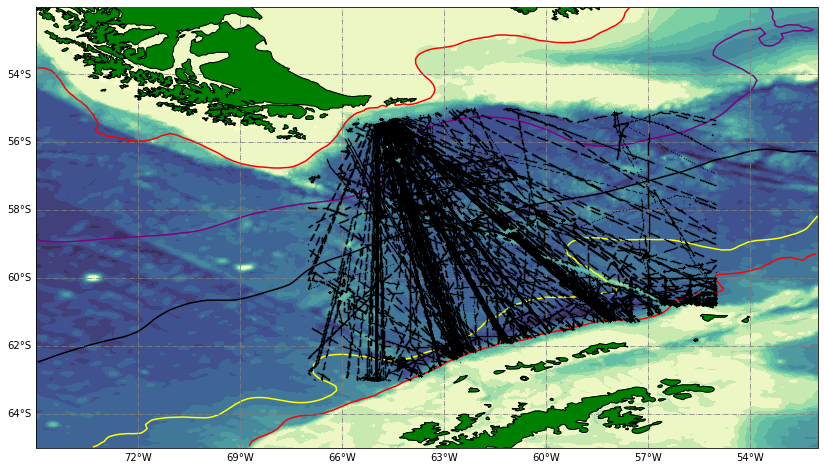

In [22]:
ax = rmap.plot_region()
ax.scatter(df_sel['longitude'], df_sel['latitude'], c='black', s=0.1,transform=ccrs.PlateCarree(), zorder=500)

In [23]:
df_sel.sort_values('latitude')['latitude']

261658   -62.9998
175091   -62.9998
174680   -62.9997
175033   -62.9996
174678   -62.9996
           ...   
64842    -55.0030
86998    -55.0030
157428   -55.0022
64841    -55.0010
336211   -55.0007
Name: latitude, Length: 339902, dtype: float64

In [30]:
ds = df_sel.set_index('Expocode').to_xarray().set_coords(['longitude','latitude'])
ds.where(ds['Expocode'] == '76XL20071224', drop=True)

<xarray.Dataset>
Dimensions:            (Expocode: 839)
Coordinates:
  * Expocode           (Expocode) object '76XL20071224' ... '76XL20071224'
    longitude          (Expocode) float64 -56.97 -56.97 -56.97 ... -57.52 -57.51
    latitude           (Expocode) float64 -59.52 -59.5 -59.49 ... -61.12 -61.13
Data variables:
    QC_Flag            (Expocode) object 'C' 'C' 'C' 'C' 'C' ... 'C' 'C' 'C' 'C'
    sample_depth [m]   (Expocode) float64 nan nan nan nan ... nan nan nan nan
    sal                (Expocode) float64 33.93 33.93 33.93 ... 33.84 33.84
    SST [deg.C]        (Expocode) float64 3.38 3.39 3.41 3.35 ... 3.87 3.87 3.89
    Tequ [deg.C]       (Expocode) float64 3.9 3.91 3.93 3.87 ... 4.37 4.37 4.39
    WOA_SSS            (Expocode) float64 33.91 33.91 33.91 ... 33.94 33.94
    ETOPO2_depth [m]   (Expocode) float64 3.465e+03 3.486e+03 ... 2.983e+03
    dist_to_land [km]  (Expocode) float64 307.0 310.0 311.0 ... 128.0 127.0
    datetime           (Expocode) datetime64[ns] 2008-01-19T02:44:24 ... 2008...

In [257]:
df_sel['Expocode'].nunique()

260

In [249]:
pd.MultiIndex.from_arrays([df_sel['datetime'], df_sel['Expocode']], names=['datetime', 'cruise'])

MultiIndex([('1991-12-14 08:00:00', '06AQ19911210'),
            ('1991-12-14 08:05:00', '06AQ19911210'),
            ('1991-12-14 08:10:00', '06AQ19911210'),
            ('1991-12-14 08:15:00', '06AQ19911210'),
            ('1991-12-14 08:20:00', '06AQ19911210'),
            ('1991-12-14 08:25:00', '06AQ19911210'),
            ('1991-12-14 08:30:00', '06AQ19911210'),
            ('1991-12-14 08:35:00', '06AQ19911210'),
            ('1991-12-14 08:40:00', '06AQ19911210'),
            ('1991-12-14 08:45:00', '06AQ19911210'),
            ...
            ('2008-02-04 11:06:47', '76XL20071224'),
            ('2008-02-04 11:09:10', '76XL20071224'),
            ('2008-02-04 11:11:33', '76XL20071224'),
            ('2008-02-04 11:13:56', '76XL20071224'),
            ('2008-02-04 11:16:19', '76XL20071224'),
            ('2008-02-04 11:18:42', '76XL20071224'),
            ('2008-02-04 11:21:05', '76XL20071224'),
            ('2008-02-04 11:23:28', '76XL20071224'),
            ('2008-02-04 11:26

In [242]:
df_sel.where(df_sel['ETOPO2_depth [m]'] >= 2000).dropna(how='all')

,Expocode,QC_Flag,sample_depth [m],sal,SST [deg.C],Tequ [deg.C],WOA_SSS,ETOPO2_depth [m],dist_to_land [km],longitude,latitude,datetime
0,06AQ19911210,D,5.0,34.040,4.63,NaN,34.003,3327.0,184.0,-64.73300,-56.5045,1991-12-14 08:00:00
1,06AQ19911210,D,5.0,34.040,4.65,NaN,34.003,3299.0,185.0,-64.72900,-56.5188,1991-12-14 08:05:00
2,06AQ19911210,D,5.0,34.040,4.67,NaN,34.003,3342.0,186.0,-64.72601,-56.5332,1991-12-14 08:10:00
3,06AQ19911210,D,5.0,34.040,4.67,NaN,34.003,3377.0,187.0,-64.72800,-56.5493,1991-12-14 08:15:00
4,06AQ19911210,D,5.0,34.040,4.67,NaN,34.003,3445.0,187.0,-64.72900,-56.5653,1991-12-14 08:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...
281289,76XL20071224,C,NaN,33.838,3.81,4.31,33.942,3143.0,130.0,-57.54330,-61.0945,2008-02-04 11:18:42
281290,76XL20071224,C,NaN,33.838,3.87,4.37,33.942,3056.0,129.0,-57.53410,-61.1040,2008-02-04 11:21:05
281291,76XL20071224,C,NaN,33.839,3.87,4.37,33.942,2969.0,129.0,-57.52480,-61.1136,2008-02-04 11:23:28
281292,76XL20071224,C,NaN,33.839,3.87,4.37,33.942,2944.0,128.0,-57.51530,-61.1231,2008-02-04 11:26:12


In [102]:
df_sel['yr'].values

array([1991., 1991., 1991., ..., 2008., 2008., 2008.])

In [62]:
df_sel.groupby('Expocode')

KeyError: 'None of [<pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000013C0F569430>] are in the columns'